# Student Performance Indicator

## Life cycle of the Machine Learning Project

1. Problem Statement
2. Data Collection
3. Data Checking, Cleaning and Preprocessing
4. Exploratory Data Analysis (EDA)
5. Model Training
6. Choosing the best model

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

## 1. Problem statement
This project understands how the student's performance (test scores) is affected by other variables such as Gender, Ethnicity, Parental level of education, Lunch and Test preparation course.

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

## 2. Data Collection
- Dataset Source - https://www.kaggle.com/datasets/spscientist/students-performance-in-exams
- The data consists of 8 column and 1000 rows.

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

### Importing the necessary libraries and dataset

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('E:/MLPROJECT/notebook/data/stud.csv')
df

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [3]:
df.shape

(1000, 8)

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

## 3. Data Checks to perform

- Check Missing values
- Check Duplicates
- Check data type
- Check the number of unique values of each column
- Check statistics of data set
- Check various categories present in the different categorical column

In [4]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [5]:
df.isnull().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

In [6]:
df.duplicated().sum()

np.int64(0)

In [7]:
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

### Insights:

1. All the mean values of numerical columns lie close to each other: within the range of 66-69
2. All the standard deviation values of numerical columns lie close to each other: within the range of 14.6 - 15.19
3. While there is a minimum score of 0 for math, it is higher for writing, i.e, 10 and much higher for reading, i.e., 17
4. There are no null values to handle with
5. There are no duplicate values to handle with

In [8]:
# Check for unique values in categorical variables
print("Unique values in categorical variables:")

print("\nCategories in 'gender' variable:")
print(df['gender'].unique().tolist())

print("\nCategories in 'race_ethnicity' variable:")
print(df['race_ethnicity'].unique().tolist())

print("\nCategories in 'parental level of education' variable:")
print(df['parental_level_of_education'].unique().tolist())

print("\nCategories in 'lunch' variable:")
print(df['lunch'].unique().tolist())

print("\nCategories in 'test preparation course' variable:")
print(df['test_preparation_course'].unique().tolist())

Unique values in categorical variables:

Categories in 'gender' variable:
['female', 'male']

Categories in 'race_ethnicity' variable:
['group B', 'group C', 'group A', 'group D', 'group E']

Categories in 'parental level of education' variable:
["bachelor's degree", 'some college', "master's degree", "associate's degree", 'high school', 'some high school']

Categories in 'lunch' variable:
['standard', 'free/reduced']

Categories in 'test preparation course' variable:
['none', 'completed']


In [9]:
# Define numerical and categorical columns

numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

# print columns
print('\n{} numerical features: {}'.format(len(numeric_features), numeric_features))
print('\n{} categorical features: {}'.format(len(categorical_features), categorical_features))


3 numerical features: ['math_score', 'reading_score', 'writing_score']

5 categorical features: ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


In [10]:
# Adding columns for total score and average score

df['total_score'] = df['math_score'] + df['reading_score'] + df['writing_score']
df['average_score'] = df[['math_score', 'reading_score', 'writing_score']].mean(axis = 1).round(2)
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.67
1,female,group C,some college,standard,completed,69,90,88,247,82.33
2,female,group B,master's degree,standard,none,90,95,93,278,92.67
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.33
4,male,group C,some college,standard,none,76,78,75,229,76.33


In [11]:
reading_full = df[df['reading_score'] == 100]['average_score'].count()
writing_full = df[df['writing_score'] == 100]['average_score'].count()
math_full = df[df['math_score'] == 100]['average_score'].count()

print(f'Number of students with full marks in Maths: {math_full}')
print(f'Number of students with full marks in Writing: {writing_full}')
print(f'Number of students with full marks in Reading: {reading_full}')

Number of students with full marks in Maths: 7
Number of students with full marks in Writing: 14
Number of students with full marks in Reading: 17


In [12]:
reading_less_20 = df[df['reading_score'] <= 20]['average_score'].count()
writing_less_20 = df[df['writing_score'] <= 20]['average_score'].count()
math_less_20 = df[df['math_score'] <= 20]['average_score'].count()

print(f'Number of students with less than 20 marks in Maths: {math_less_20}')
print(f'Number of students with less than 20 marks in Writing: {writing_less_20}')
print(f'Number of students with less than 20 marks in Reading: {reading_less_20}')

Number of students with less than 20 marks in Maths: 4
Number of students with less than 20 marks in Writing: 3
Number of students with less than 20 marks in Reading: 1


###  Insights
 - From above values we get students have performed the worst in Maths 
 - Best performance is in reading section

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

## 4. Exploratory Data Analysis (EDA)

### Histogram and KDE for total_score

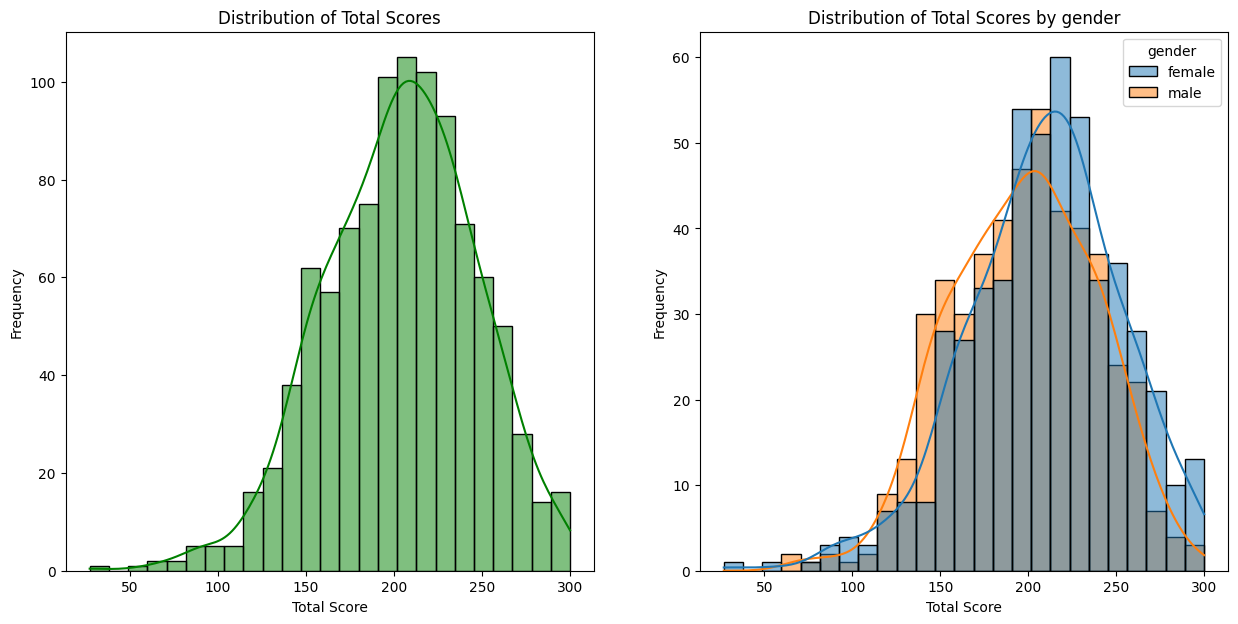

In [13]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))

plt.subplot(121)
sns.histplot(data = df, x = 'total_score', bins = 25, kde = True, color = 'g')
plt.title('Distribution of Total Scores')
plt.xlabel('Total Score')
plt.ylabel('Frequency')

plt.subplot(122)
sns.histplot(data = df, x = 'total_score', bins = 25, kde = True, hue = 'gender')
plt.title('Distribution of Total Scores by gender')
plt.xlabel('Total Score')
plt.ylabel('Frequency')

plt.show()

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

### Histogram and KDE for average_score

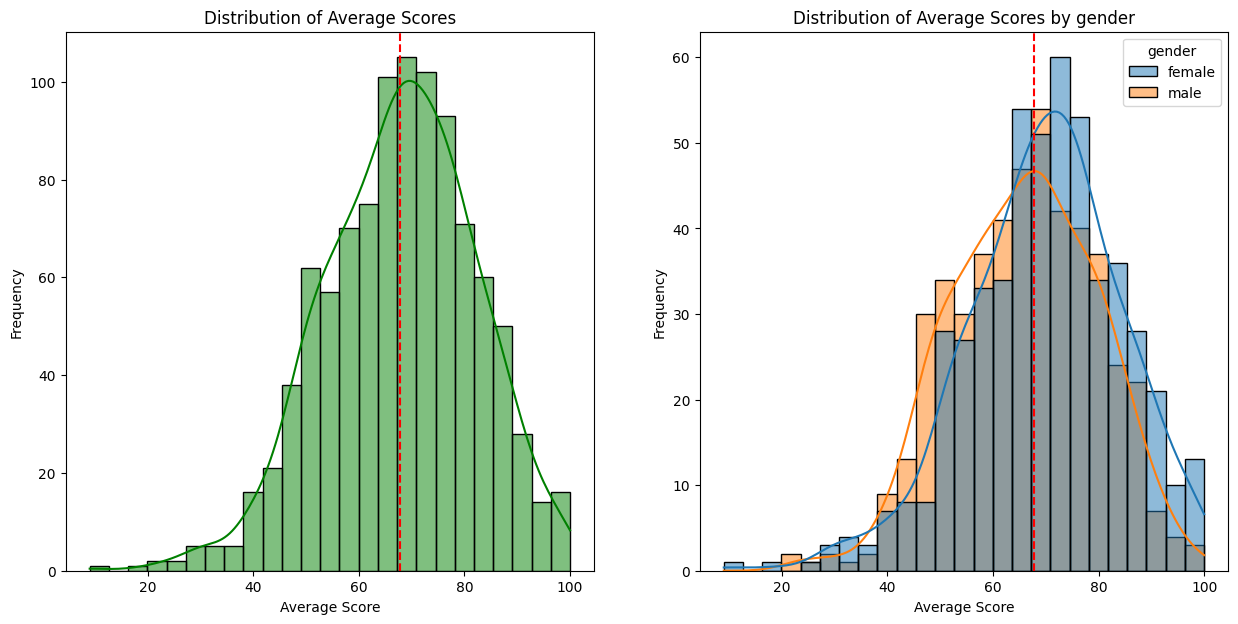

In [14]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))

plt.subplot(121)
sns.histplot(data = df, x = 'average_score', bins = 25, kde = True, color = 'g')
plt.title('Distribution of Average Scores')
plt.xlabel('Average Score')
plt.ylabel('Frequency')
plt.axvline(df['average_score'].mean(), color = 'r', linestyle = '--', label = 'Mean')

plt.subplot(122)
sns.histplot(data = df, x = 'average_score', bins = 25, kde = True, hue = 'gender')
plt.title('Distribution of Average Scores by gender')
plt.xlabel('Average Score')
plt.ylabel('Frequency')
plt.axvline(df['average_score'].mean(), color = 'r', linestyle = '--', label = 'Mean')

plt.show()

### Insights

- Females tend to perform better in comparison to males
- Both in terms of total_score and average_score

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

### Histogram and KDE for lunch

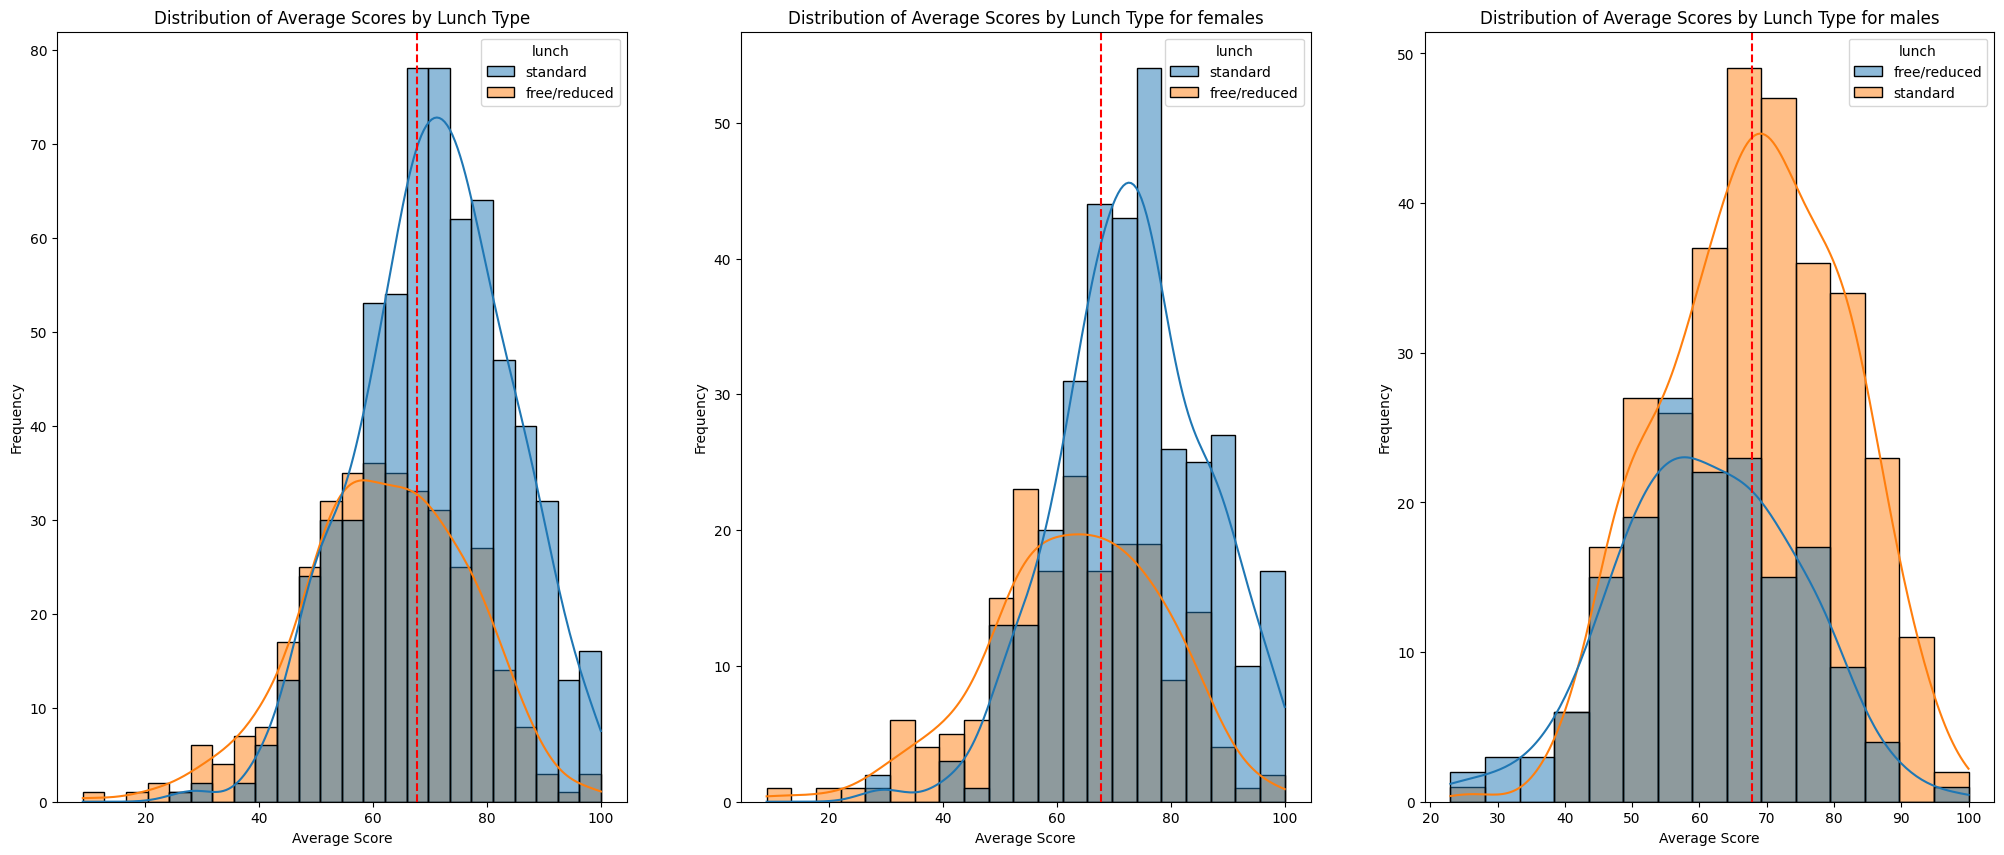

In [15]:
plt.subplots(1,3, figsize = (25,10))

plt.subplot(131)
sns.histplot(data = df, x = 'average_score', kde = True, hue = 'lunch')
plt.title('Distribution of Average Scores by Lunch Type')
plt.xlabel('Average Score')
plt.ylabel('Frequency')
plt.axvline(df['average_score'].mean(), color = 'r', linestyle = '--', label = 'Mean')

plt.subplot(132)
sns.histplot(data = df[df['gender'] == 'female'], x = 'average_score', kde = True, hue = 'lunch')
plt.title('Distribution of Average Scores by Lunch Type for females')
plt.xlabel('Average Score')
plt.ylabel('Frequency')
plt.axvline(df['average_score'].mean(), color = 'r', linestyle = '--', label = 'Mean')

plt.subplot(133)
sns.histplot(data = df[df['gender'] == 'male'], x = 'average_score', kde = True, hue = 'lunch')
plt.title('Distribution of Average Scores by Lunch Type for males')
plt.xlabel('Average Score')
plt.ylabel('Frequency')
plt.axvline(df['average_score'].mean(), color = 'r', linestyle = '--', label = 'Mean')

plt.show()

###  Insights
- Standard lunch helps perform well in exams.
- Standard lunch helps perform well in exams be it a male or a female.

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

### Histogram and KDE for parental_level_of_education

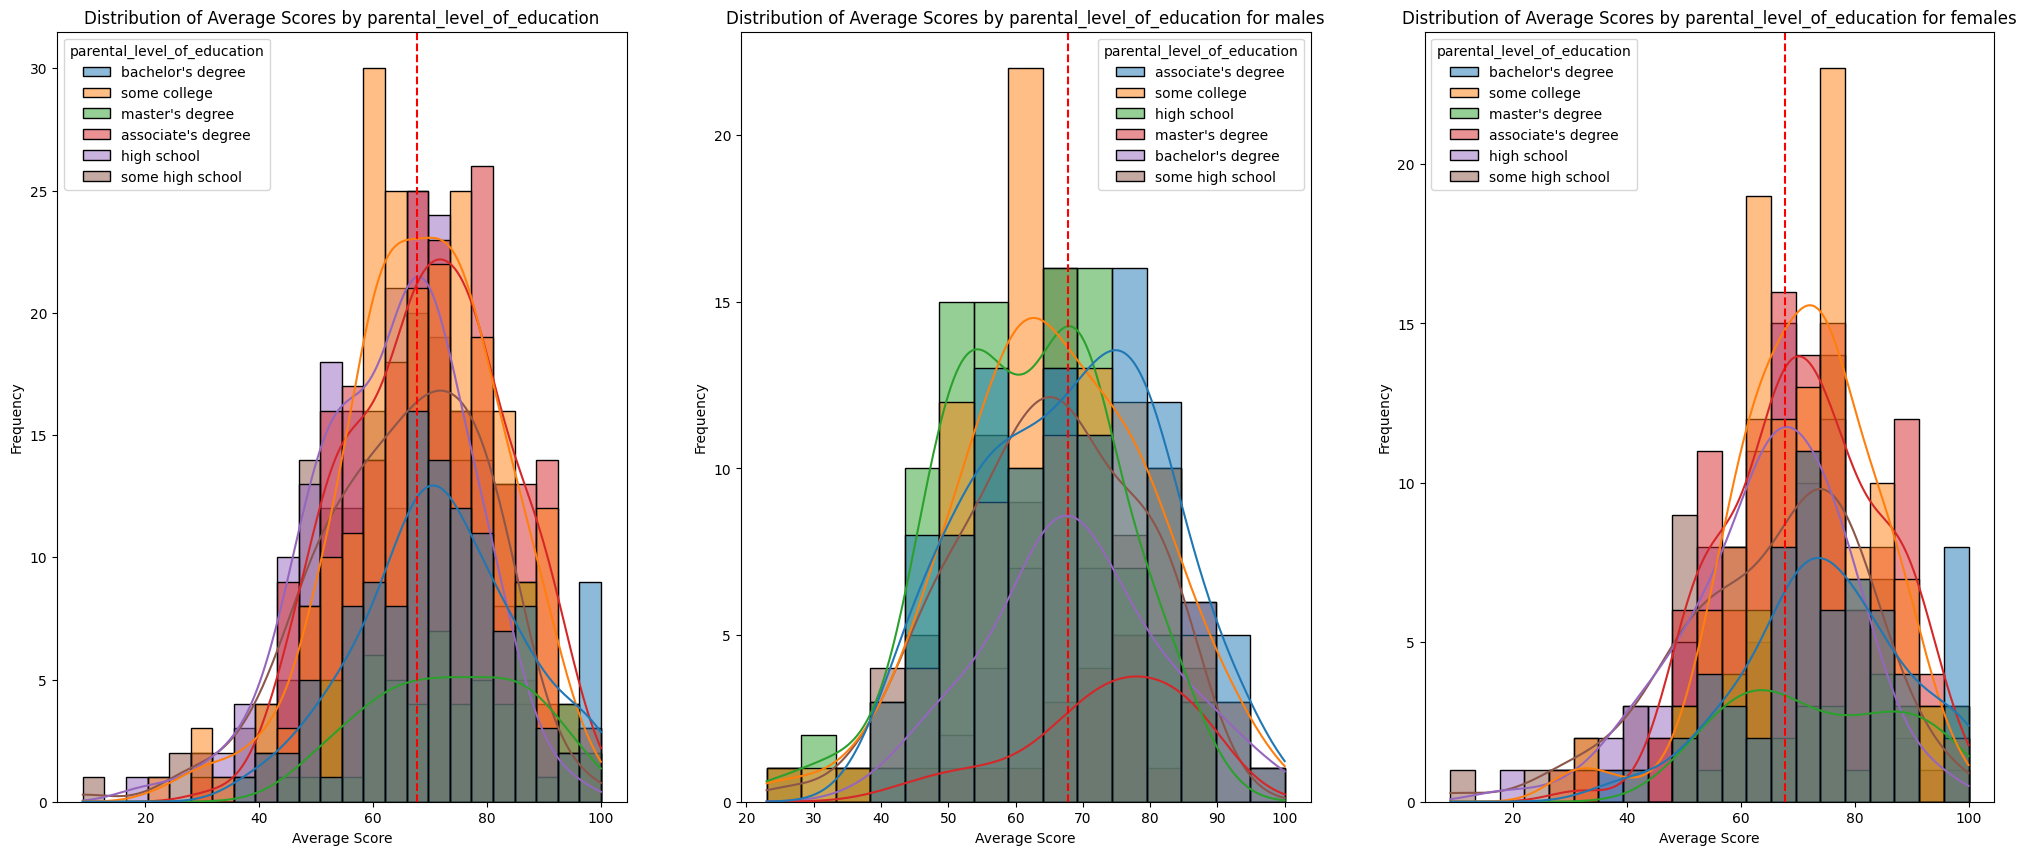

In [16]:
plt.subplots(1,3, figsize = (25,10))

plt.subplot(131)
sns.histplot(data = df, x = 'average_score', kde = True, hue = 'parental_level_of_education')
plt.title('Distribution of Average Scores by parental_level_of_education')
plt.xlabel('Average Score')
plt.ylabel('Frequency')
plt.axvline(df['average_score'].mean(), color = 'r', linestyle = '--', label = 'Mean')

plt.subplot(132)
sns.histplot(data = df[df['gender'] == 'male'], x = 'average_score', kde = True, hue = 'parental_level_of_education')
plt.title('Distribution of Average Scores by parental_level_of_education for males')
plt.xlabel('Average Score')
plt.ylabel('Frequency')
plt.axvline(df['average_score'].mean(), color = 'r', linestyle = '--', label = 'Mean')

plt.subplot(133)
sns.histplot(data = df[df['gender'] == 'female'], x = 'average_score', kde = True, hue = 'parental_level_of_education')
plt.title('Distribution of Average Scores by parental_level_of_education for females')
plt.xlabel('Average Score')
plt.ylabel('Frequency')
plt.axvline(df['average_score'].mean(), color = 'r', linestyle = '--', label = 'Mean')

plt.show()

###  Insights
- In general parent's education don't help student perform well in exam.
- 2nd plot shows that parent's whose education is of associate's degree or master's degree their male child tend to perform well in exam
- 3rd plot we can see there is no effect of parent's education on female students.

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

### Histogram and KDE for race/ethnicity

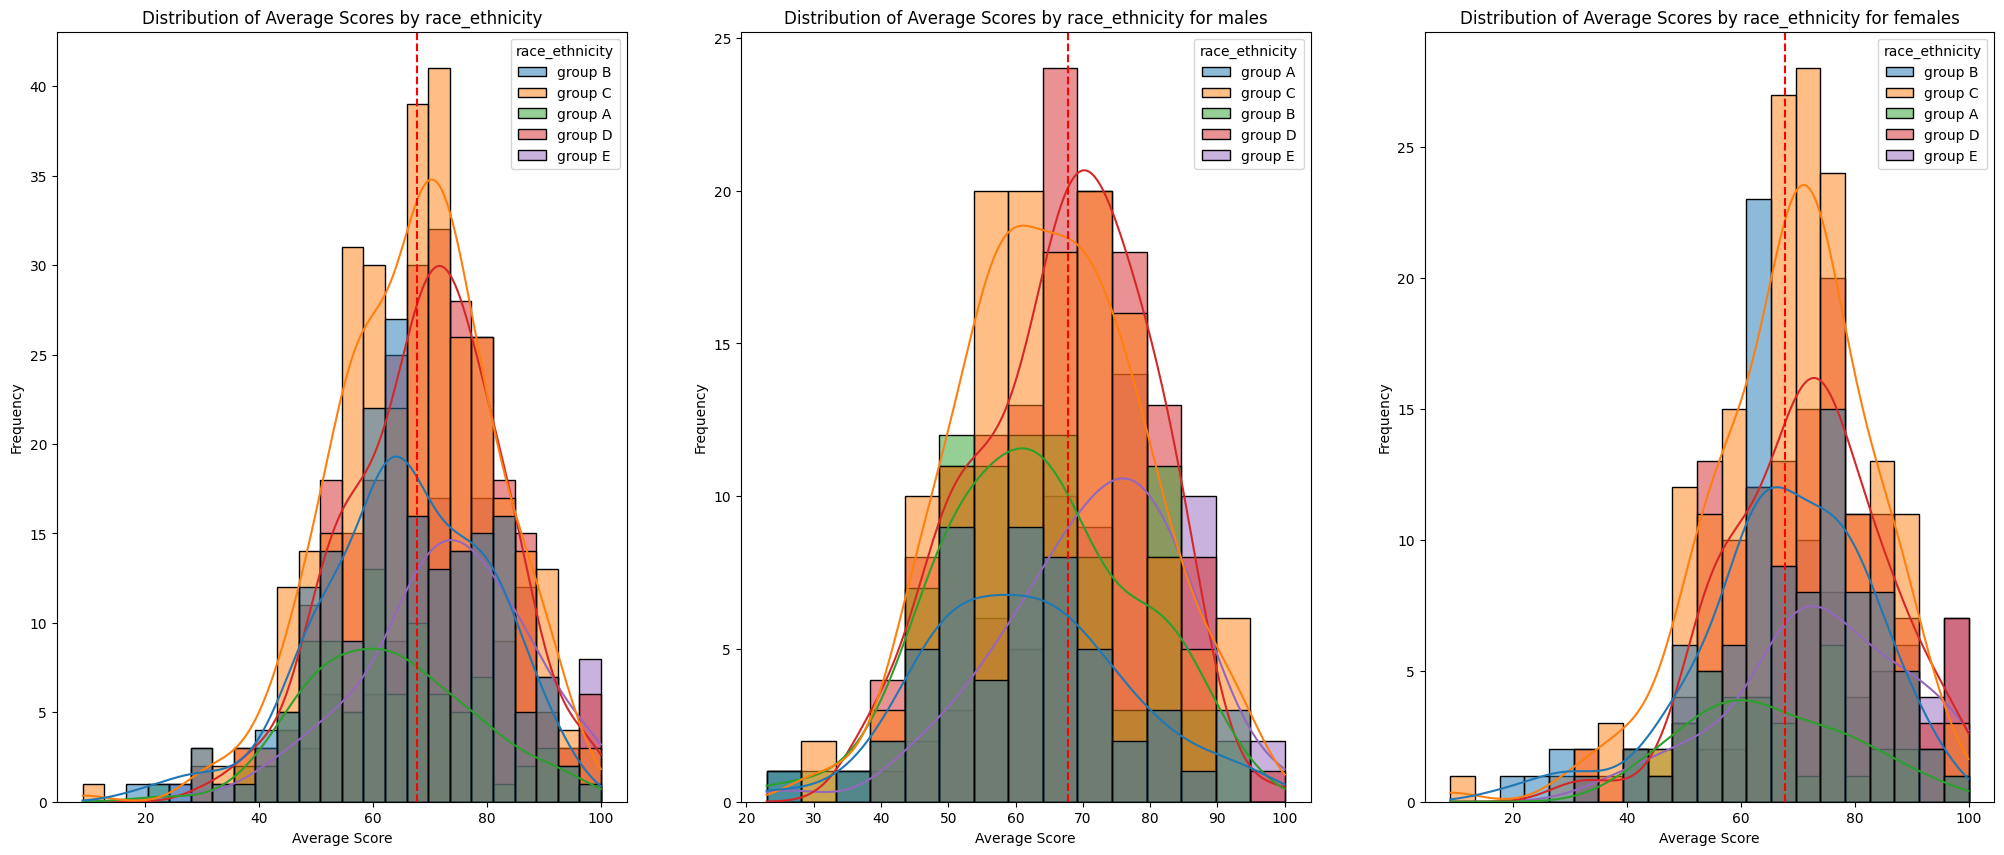

In [17]:
plt.subplots(1,3, figsize = (25,10))

plt.subplot(131)
sns.histplot(data = df, x = 'average_score', kde = True, hue = 'race_ethnicity')
plt.title('Distribution of Average Scores by race_ethnicity')
plt.xlabel('Average Score')
plt.ylabel('Frequency')
plt.axvline(df['average_score'].mean(), color = 'r', linestyle = '--', label = 'Mean')

plt.subplot(132)
sns.histplot(data = df[df['gender'] == 'male'], x = 'average_score', kde = True, hue = 'race_ethnicity')
plt.title('Distribution of Average Scores by race_ethnicity for males')
plt.xlabel('Average Score')
plt.ylabel('Frequency')
plt.axvline(df['average_score'].mean(), color = 'r', linestyle = '--', label = 'Mean')

plt.subplot(133)
sns.histplot(data = df[df['gender'] == 'female'], x = 'average_score', kde = True, hue = 'race_ethnicity')
plt.title('Distribution of Average Scores by race_ethnicity for females')
plt.xlabel('Average Score')
plt.ylabel('Frequency')
plt.axvline(df['average_score'].mean(), color = 'r', linestyle = '--', label = 'Mean')

plt.show()

### Insights

- Students of group C tend to perform the best irrespective of gender
- Students of group A and B tend to perform the poorest irrespective of gender

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

### Maximum score of students in all three subjects

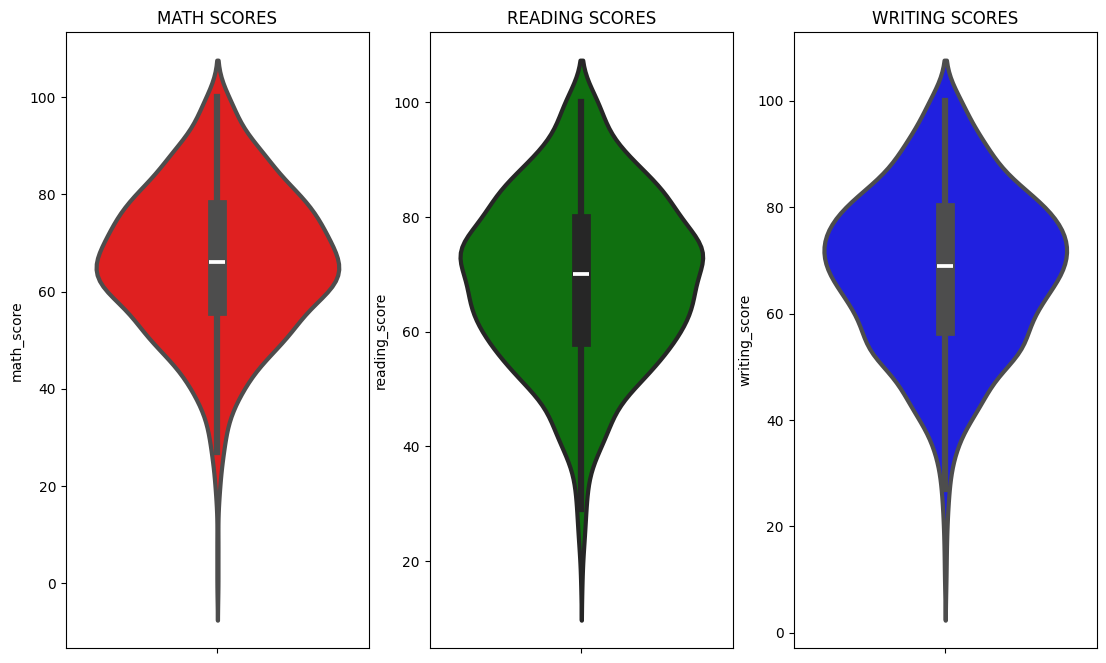

In [18]:
plt.figure(figsize = (18,8))

plt.subplot(1, 4, 1)
plt.title('MATH SCORES')
sns.violinplot(y = 'math_score', data = df, color = 'red', linewidth = 3)

plt.subplot(1, 4, 2)
plt.title('READING SCORES')
sns.violinplot(y = 'reading_score', data = df, color = 'green', linewidth = 3)

plt.subplot(1, 4, 3)
plt.title('WRITING SCORES')
sns.violinplot(y = 'writing_score', data = df, color = 'blue', linewidth = 3)

plt.show()

### Insights
- From the above three plots its clearly visible that most of the students score in between 60-80 in Maths whereas in reading and writing most of them score from 50-80

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

### Multivariate analysis using pieplots

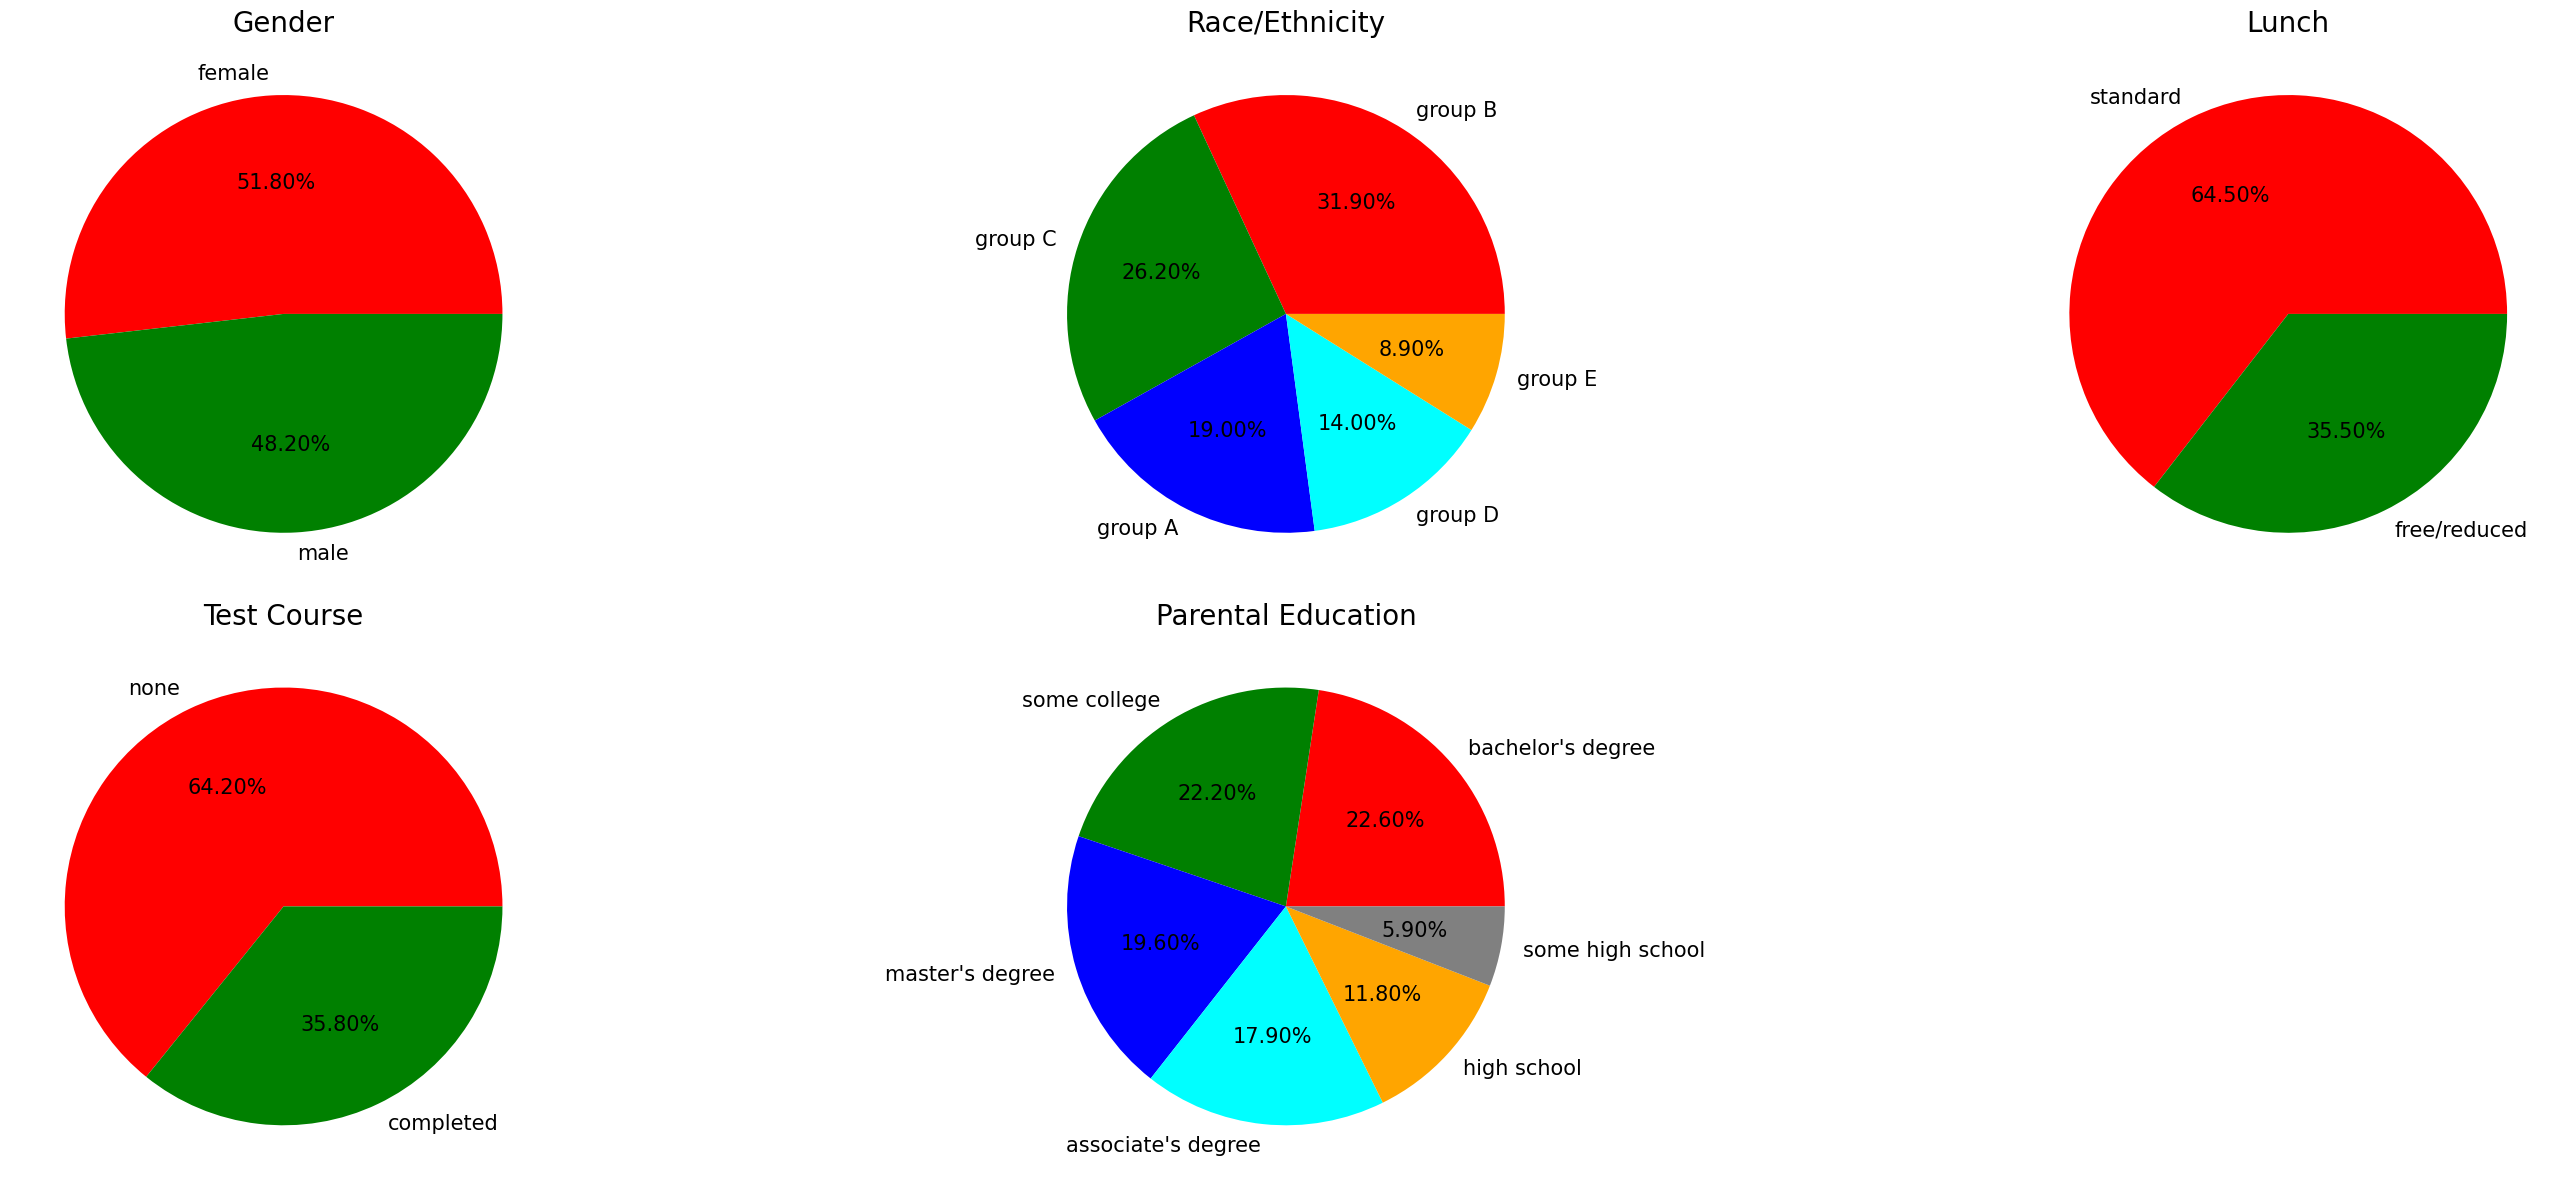

In [19]:
plt.rcParams['figure.figsize'] = (30, 12)

## Gender

plt.subplot(2, 3, 1)
size = df['gender'].value_counts()
labels = df['gender'].unique()
color = ['red','green']

plt.pie(size, colors = color, labels = labels, autopct = '%1.2f%%', textprops = {'fontsize':15})
plt.title('Gender', fontsize = 20)
plt.axis('off')

## Race/Ethnicity

plt.subplot(2, 3, 2)
size = df['race_ethnicity'].value_counts()
labels = df['race_ethnicity'].unique()
color = ['red', 'green', 'blue', 'cyan','orange']

plt.pie(size, colors = color, labels = labels, autopct = '%1.2f%%', textprops = {'fontsize':15})
plt.title('Race/Ethnicity', fontsize = 20)
plt.axis('off')

## Lunch

plt.subplot(2, 3, 3)
size = df['lunch'].value_counts()
labels = df['lunch'].unique()
color = ['red','green']

plt.pie(size, colors = color, labels = labels, autopct = '%1.2f%%', textprops = {'fontsize':15})
plt.title('Lunch', fontsize = 20)
plt.axis('off')

## Test Preparation Course

plt.subplot(2, 3, 4)
size = df['test_preparation_course'].value_counts()
labels = df['test_preparation_course'].unique()
color = ['red','green']

plt.pie(size, colors = color, labels = labels, autopct = '%1.2f%%', textprops = {'fontsize':15})
plt.title('Test Course', fontsize = 20)
plt.axis('off')

## Parental Level of Education

plt.subplot(2, 3, 5)
size = df['parental_level_of_education'].value_counts()
labels = df['parental_level_of_education'].unique()
color = ['red', 'green', 'blue', 'cyan','orange','grey']

plt.pie(size, colors = color, labels = labels, autopct = '%1.2f%%', textprops = {'fontsize':15})
plt.title('Parental Education', fontsize = 20)
plt.axis('off')


plt.tight_layout()
plt.grid()
plt.show()

###  Insights
- Number of Male and Female students is almost equal
- Number students are greatest in Group C
- Number of students who have standard lunch are greater
- Number of students who have not enrolled in any test preparation course is greater
- Number of students whose parental education is "Some College" is greater followed closely by "Associate's Degree"

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

### Feature-wise visualisation

#### Univariate Analysis of Gender

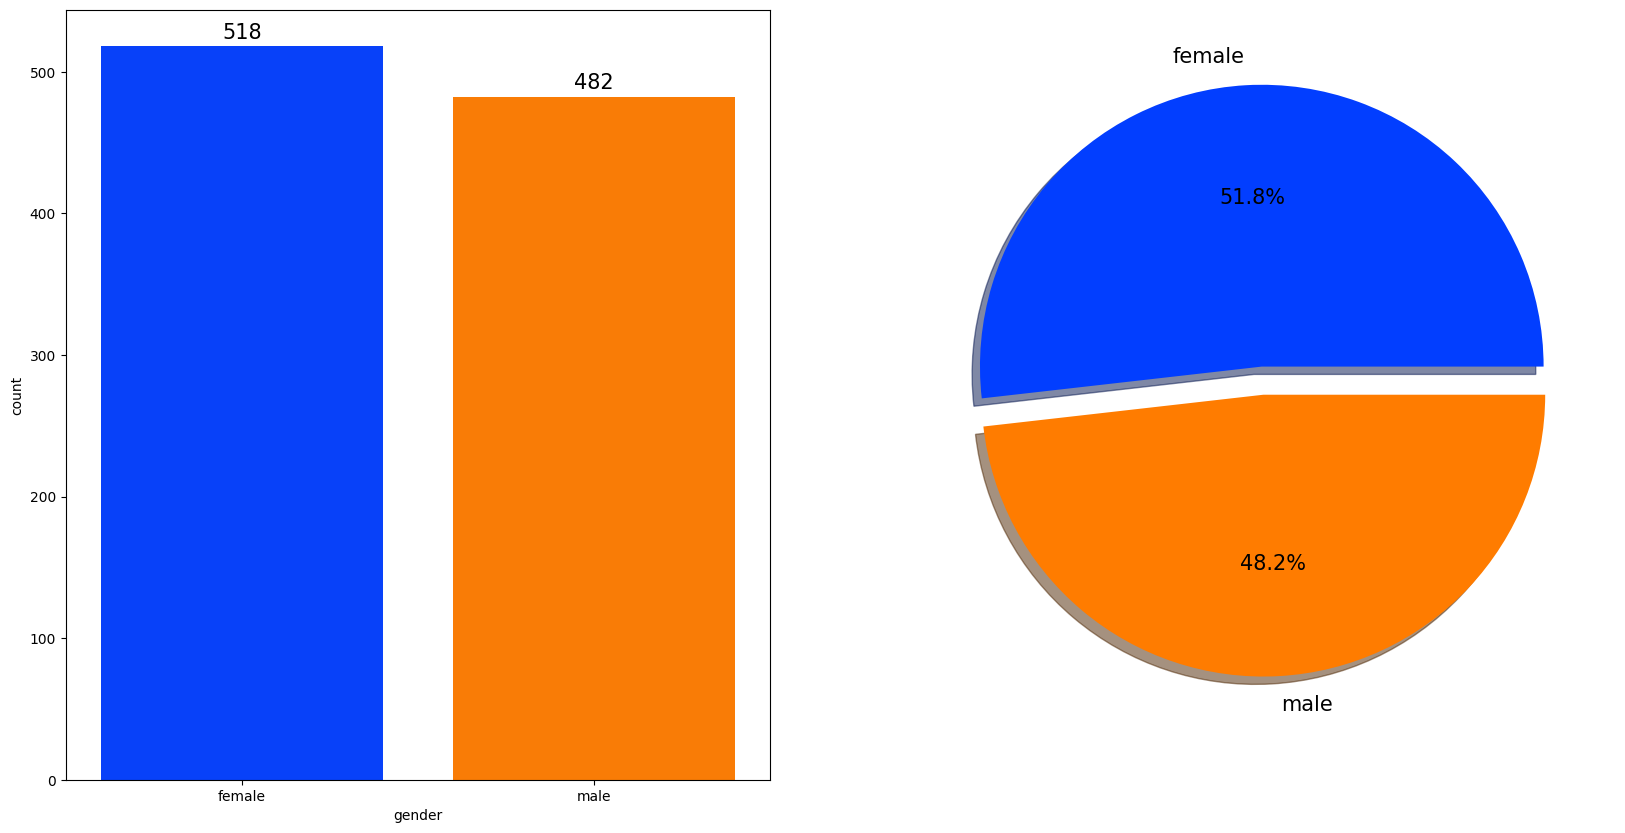

In [20]:
counts = df['gender'].value_counts()
labels = counts.index
colors = sns.color_palette('bright', len(labels))
color_dict = dict(zip(labels, colors))

f,ax = plt.subplots(1,2, figsize = (20,10))

## Plotting the countplot
sns.countplot(x = df['gender'], data = df, palette = color_dict, ax = ax[0], saturation = 0.95)
for container in ax[0].containers:
    ax[0].bar_label(container, color = 'black', size = 15, label_type = 'edge', padding = 3)

## Plotting the pie chart
plt.pie(
    x = counts, labels = counts.index, explode=[0.1] + [0]*(len(counts)-1), autopct='%1.1f%%',
    textprops={'fontsize': 15}, shadow=True, colors = [color_dict[label] for label in labels]
)

plt.show()

#### Insights 
- Gender has balanced data with female students are 518 (48%) and male students are 482 (52%) 

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

#### Bivariate Analysis of Gender

In [21]:
gender_group = df.groupby('gender').mean(numeric_only = True)
gender_group

,math_score,reading_score,writing_score,total_score,average_score
gender,,,,,
female,63.633205,72.608108,72.467181,208.708494,69.569498
male,68.728216,65.473029,63.311203,197.512448,65.837303


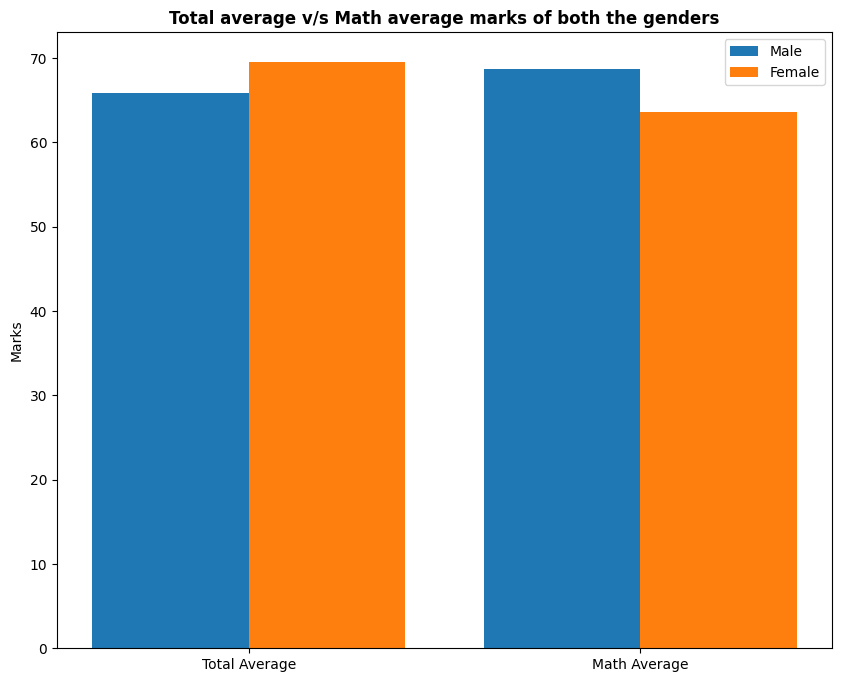

In [22]:
plt.figure(figsize = (10, 8))

X = ['Total Average', 'Math Average']

female_scores = [gender_group['average_score'][0], gender_group['math_score'][0]]
male_scores = [gender_group['average_score'][1], gender_group['math_score'][1]]

X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, male_scores, 0.4, label = 'Male')
plt.bar(X_axis + 0.2, female_scores, 0.4, label = 'Female')
  
plt.xticks(X_axis, X)
plt.ylabel("Marks")
plt.title('Total average v/s Math average marks of both the genders', fontweight='bold')

plt.legend()
plt.show()

#### Insights 
- On an average females have a better overall score than men.
- whereas males have scored higher in Maths.

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

#### Univariate analysis of race/ethnicity

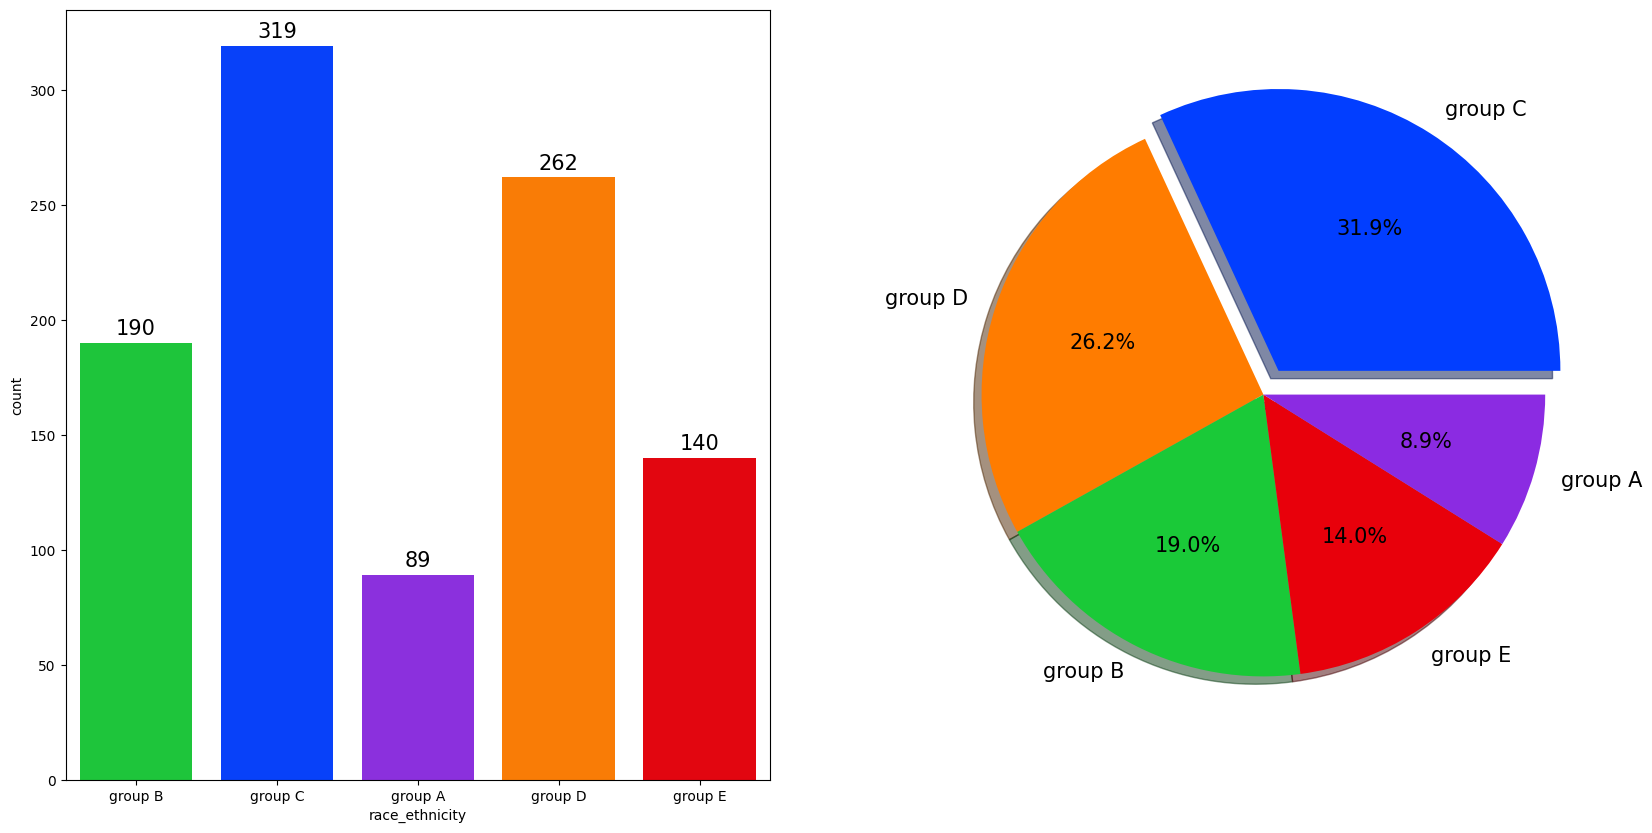

In [23]:
counts = df['race_ethnicity'].value_counts()
labels = counts.index
colors = sns.color_palette('bright', len(labels))
color_dict = dict(zip(labels, colors))

f,ax = plt.subplots(1,2, figsize = (20,10))

## Plotting the countplot
sns.countplot(x = df['race_ethnicity'], data = df, palette = color_dict, ax = ax[0], saturation = 0.95)
for container in ax[0].containers:
    ax[0].bar_label(container, color = 'black', size = 15, label_type = 'edge', padding = 3)

## Plotting the pie chart
plt.pie(
    x = counts, labels = counts.index, explode=[0.1] + [0]*(len(counts)-1), autopct='%1.1f%%',
    textprops={'fontsize': 15}, shadow=True, colors = [color_dict[label] for label in labels]
)

plt.show()

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

#### Bivariate Analysis of race/ethnicity

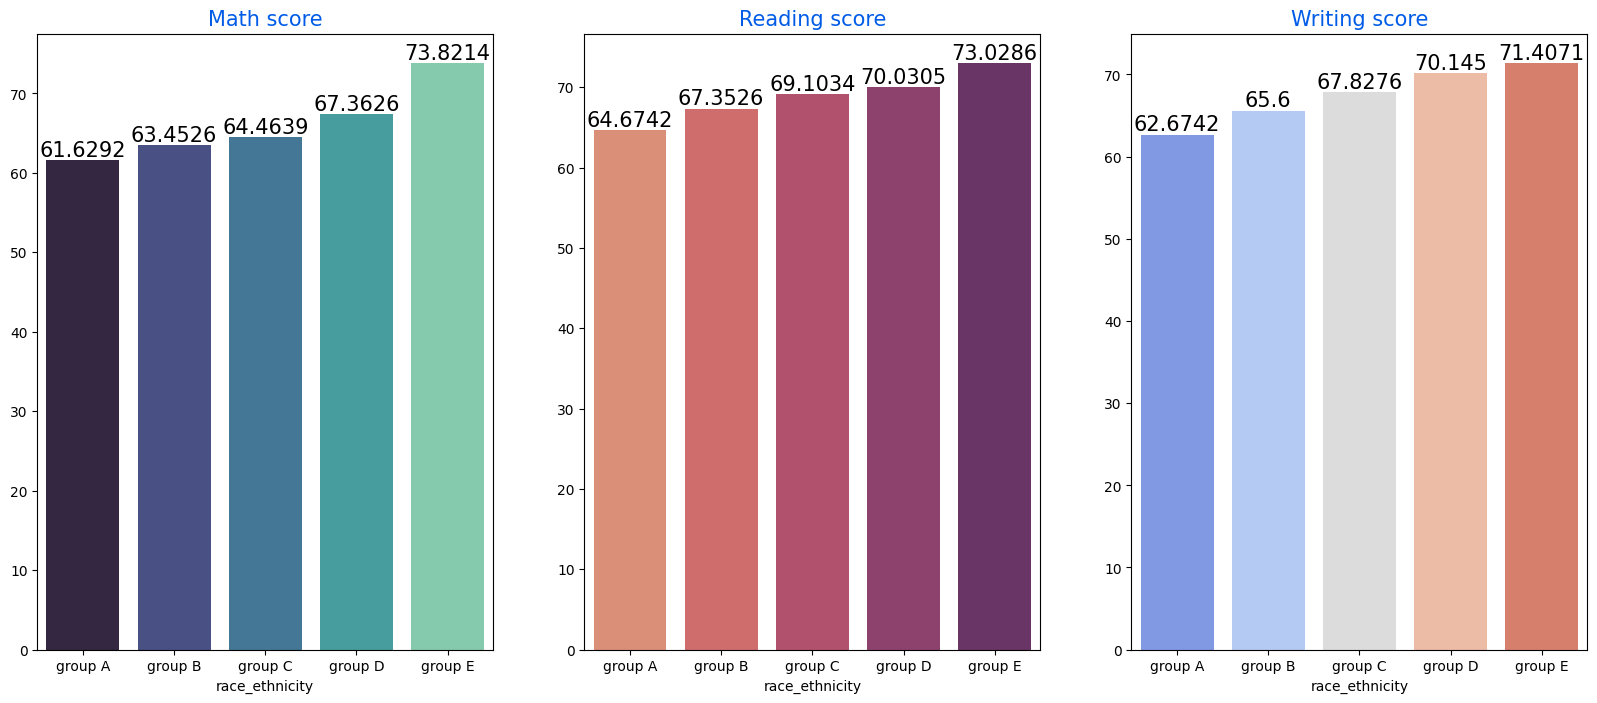

In [24]:
group_data2 = df.groupby('race_ethnicity')
f,ax = plt.subplots(1,3, figsize = (20,8))

sns.barplot(x = group_data2['math_score'].mean().index, y = group_data2['math_score'].mean().values, palette = 'mako', ax = ax[0])
ax[0].set_title('Math score', color = '#005ce6',size = 15)

for container in ax[0].containers:
    ax[0].bar_label(container, color = 'black', size = 15)

sns.barplot(x = group_data2['reading_score'].mean().index, y = group_data2['reading_score'].mean().values, palette = 'flare', ax = ax[1])
ax[1].set_title('Reading score', color = '#005ce6',size = 15)

for container in ax[1].containers:
    ax[1].bar_label(container, color = 'black', size = 15)

sns.barplot(x = group_data2['writing_score'].mean().index, y = group_data2['writing_score'].mean().values, palette = 'coolwarm', ax = ax[2])
ax[2].set_title('Writing score', color = '#005ce6',size = 15)

for container in ax[2].containers:
    ax[2].bar_label(container, color = 'black', size = 15)

#### Insights 
- Group E students have scored the highest marks. 
- Group A students have scored the lowest marks. 
- Students from a lower Socioeconomic status have a lower avg in all course subjects

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

#### Univariate Analysis of Parental Level of Education

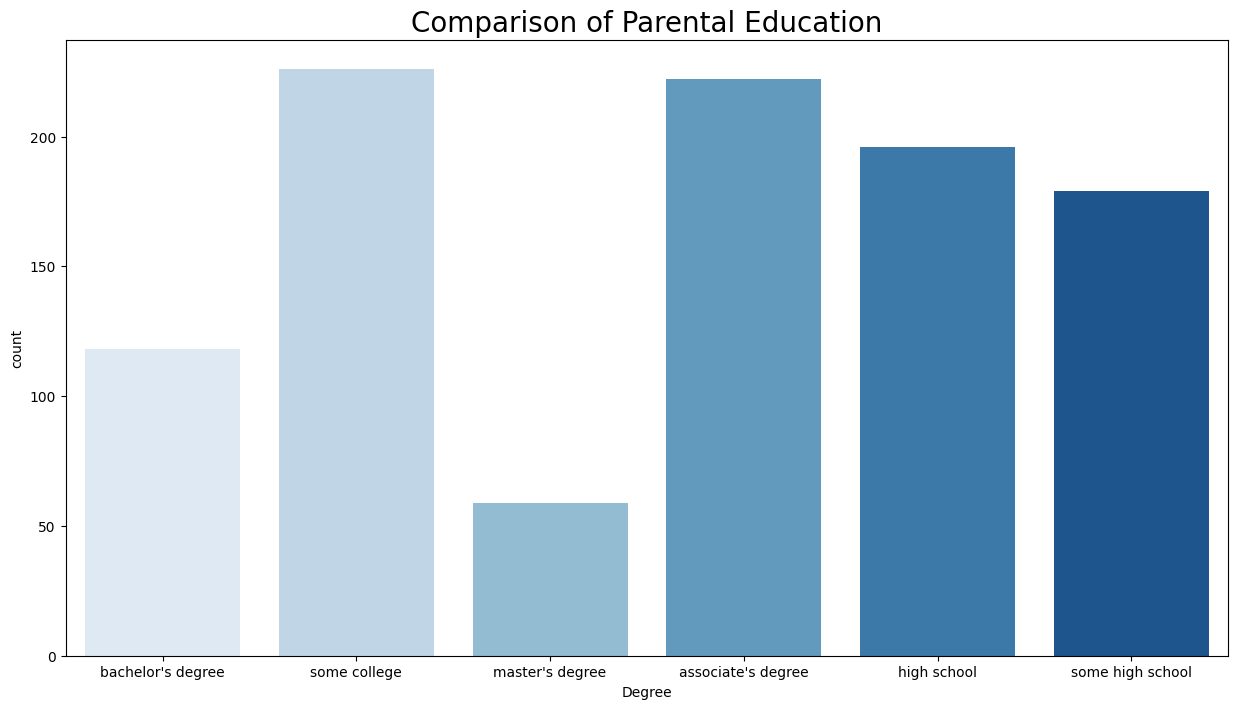

In [25]:
plt.figure(figsize = (15, 8))
sns.countplot(x = df['parental_level_of_education'], data = df, palette = 'Blues')
plt.title('Comparison of Parental Education', fontweight = 15, fontsize = 20)
plt.xlabel('Degree')
plt.ylabel('count')
plt.show()

#### Insights:

- Large number of parents are from some college, i.e, they have higher education

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

#### Bivariate Analysis of Parental Level of Education

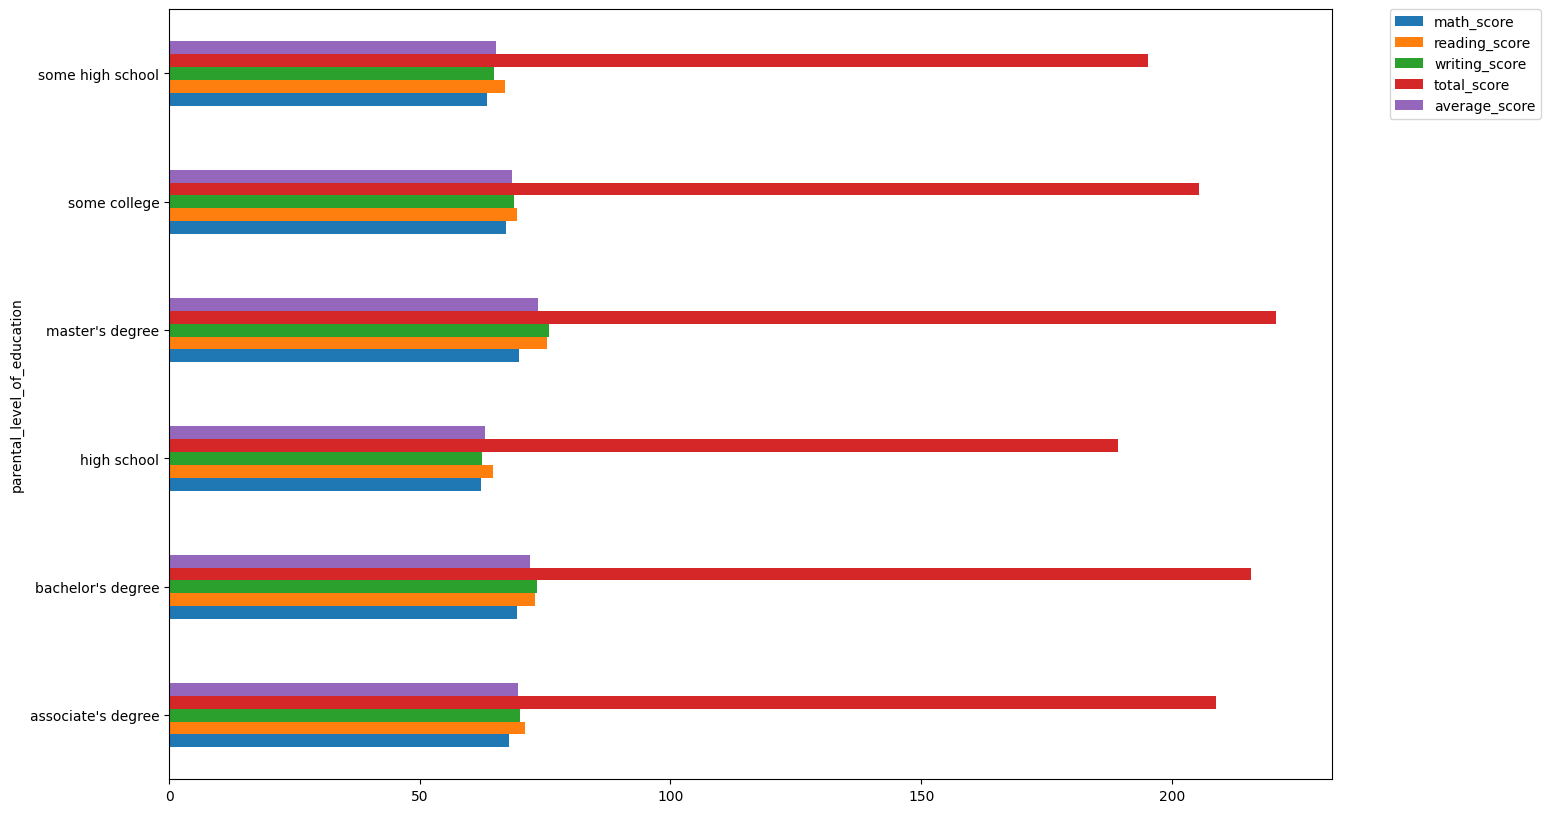

In [26]:
df.groupby('parental_level_of_education').mean(numeric_only=True).plot(kind='barh',figsize=(15, 10))
plt.legend(bbox_to_anchor = (1.05, 1), loc = 2, borderaxespad = 0.)
plt.show()

#### Insights 
- The score of student whose parents possess master and bachelor level education are higher than others.

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

#### Univariate Analysis of Lunch Type

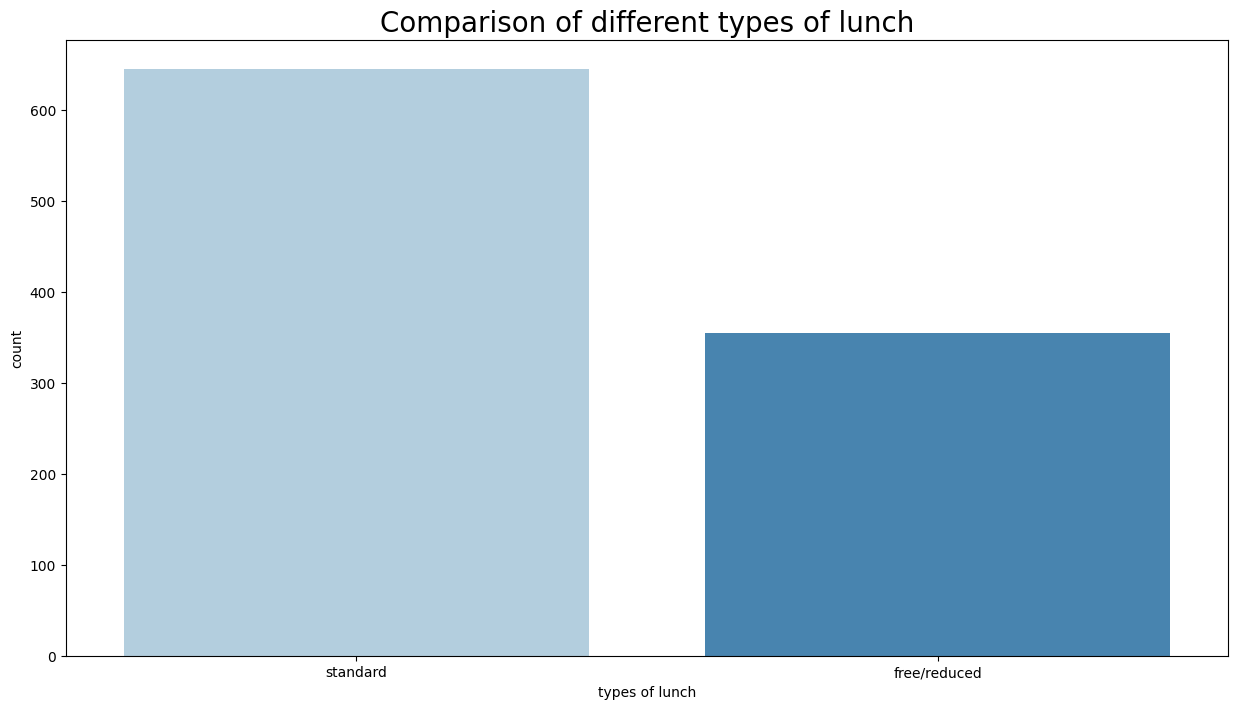

In [27]:
plt.figure(figsize = (15, 8))
sns.countplot(x = df['lunch'], data = df, palette = 'Blues')
plt.title('Comparison of different types of lunch', fontweight = 30, fontsize = 20)
plt.xlabel('types of lunch')
plt.ylabel('count')
plt.show()

#### Insights

- Students being served Standard lunch was more than free lunch

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

#### Bivariate Analysis of Lunch Type

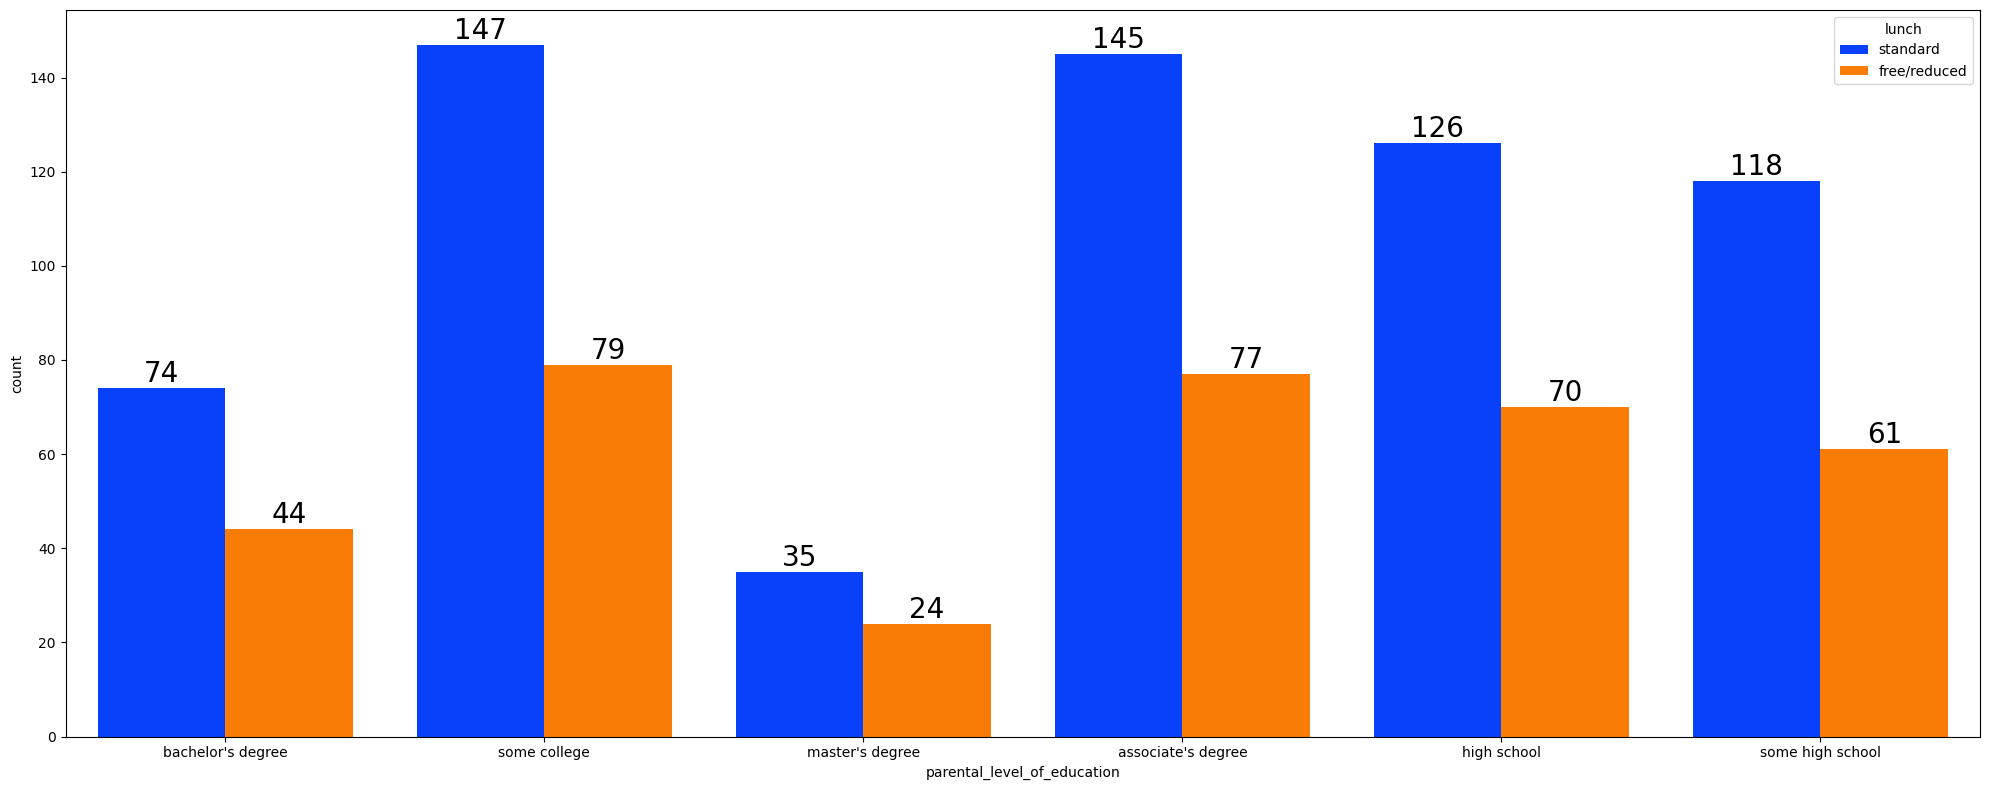

In [28]:
f, ax = plt.subplots(figsize = (20, 8))

sns.countplot(data = df, x = 'parental_level_of_education', hue = 'lunch', palette = 'bright',
              saturation = 0.95, ax = ax
)

for container in ax.containers:
    ax.bar_label(container, color = 'black', size = 20)

plt.tight_layout()
plt.show()

#### Insights

- Students who get Standard Lunch tend to perform better than students who got free/reduced lunch

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

#### Analysis of Test Preparation Course

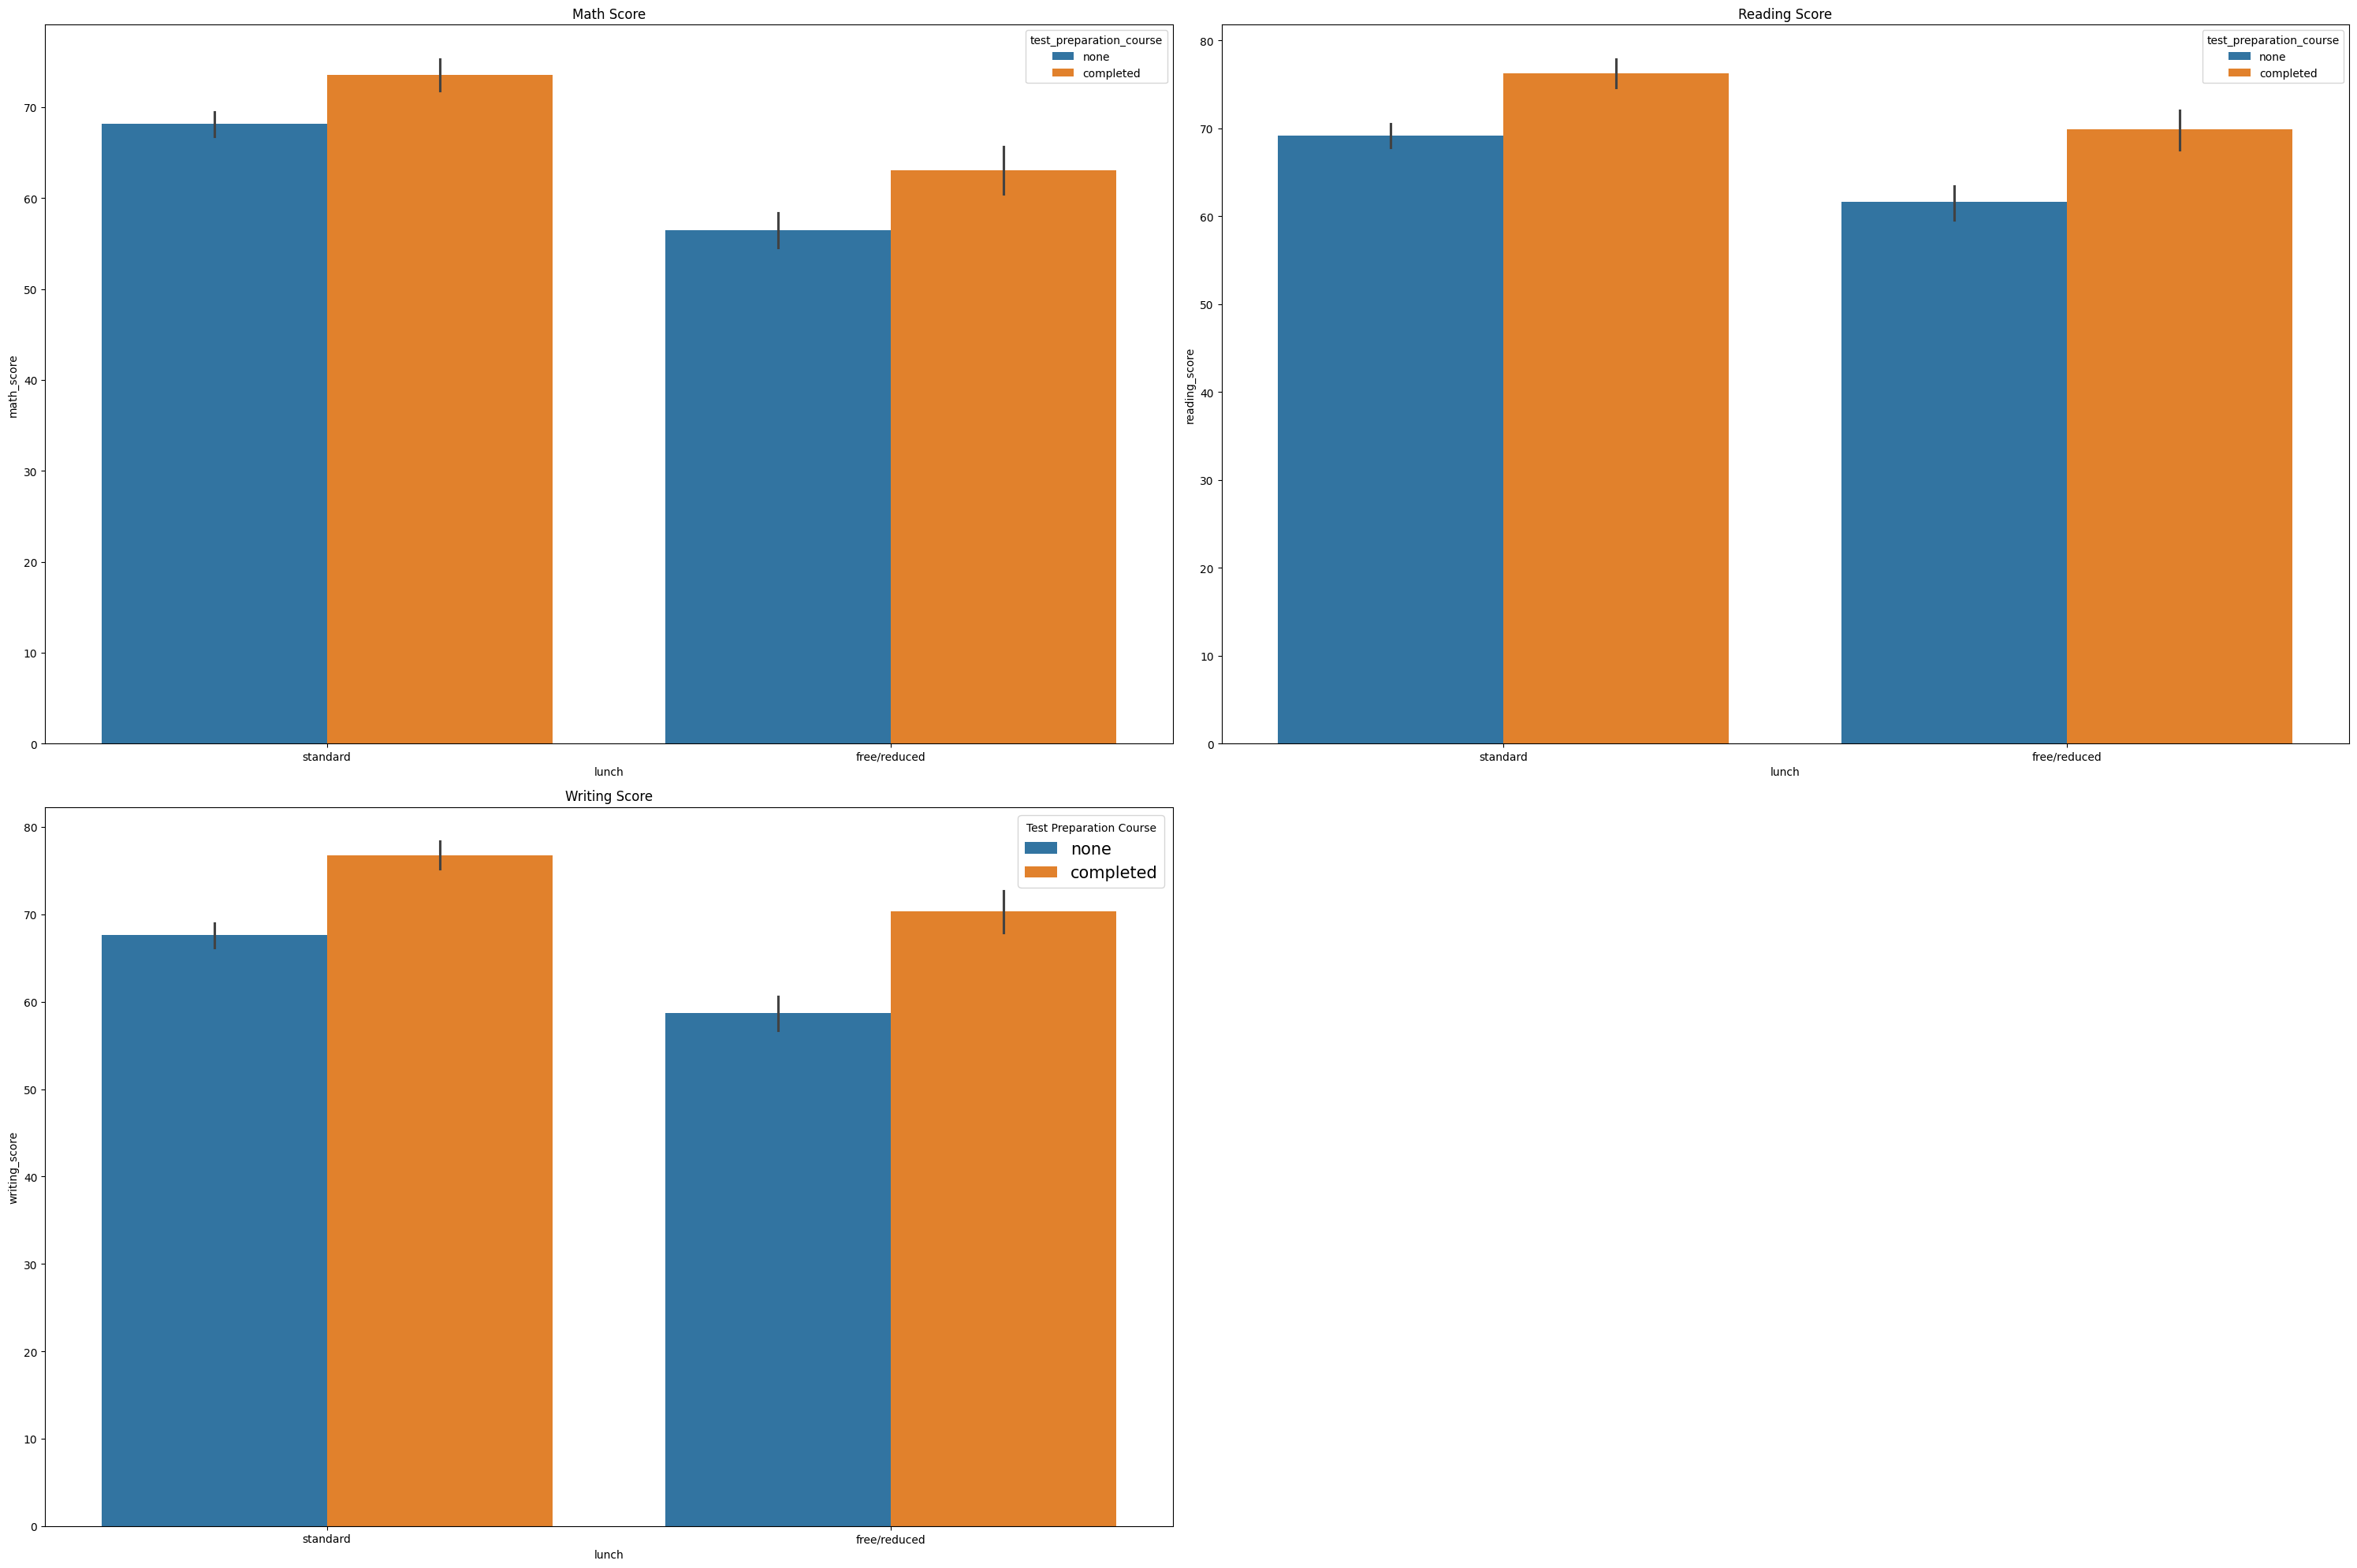

In [29]:
plt.figure(figsize = (30, 20))

plt.subplot(2,2,1)
sns.barplot (x = df['lunch'], y = df['math_score'], hue = df['test_preparation_course'])
plt.title('Math Score')

plt.subplot(2,2,2)
sns.barplot (x = df['lunch'], y = df['reading_score'], hue = df['test_preparation_course'])
plt.title('Reading Score')

plt.subplot(2,2,3)
sns.barplot (x = df['lunch'], y = df['writing_score'], hue = df['test_preparation_course'])
plt.title('Writing Score')

plt.legend(title = 'Test Preparation Course', loc = 'upper right', fontsize = 15)
plt.tight_layout()
plt.show()

#### Insights

- Students who have completed the Test Prepration Course, irrespective of lunch type, have scores higher in all three categories than those who haven't taken the course

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

#### Outlier Checking

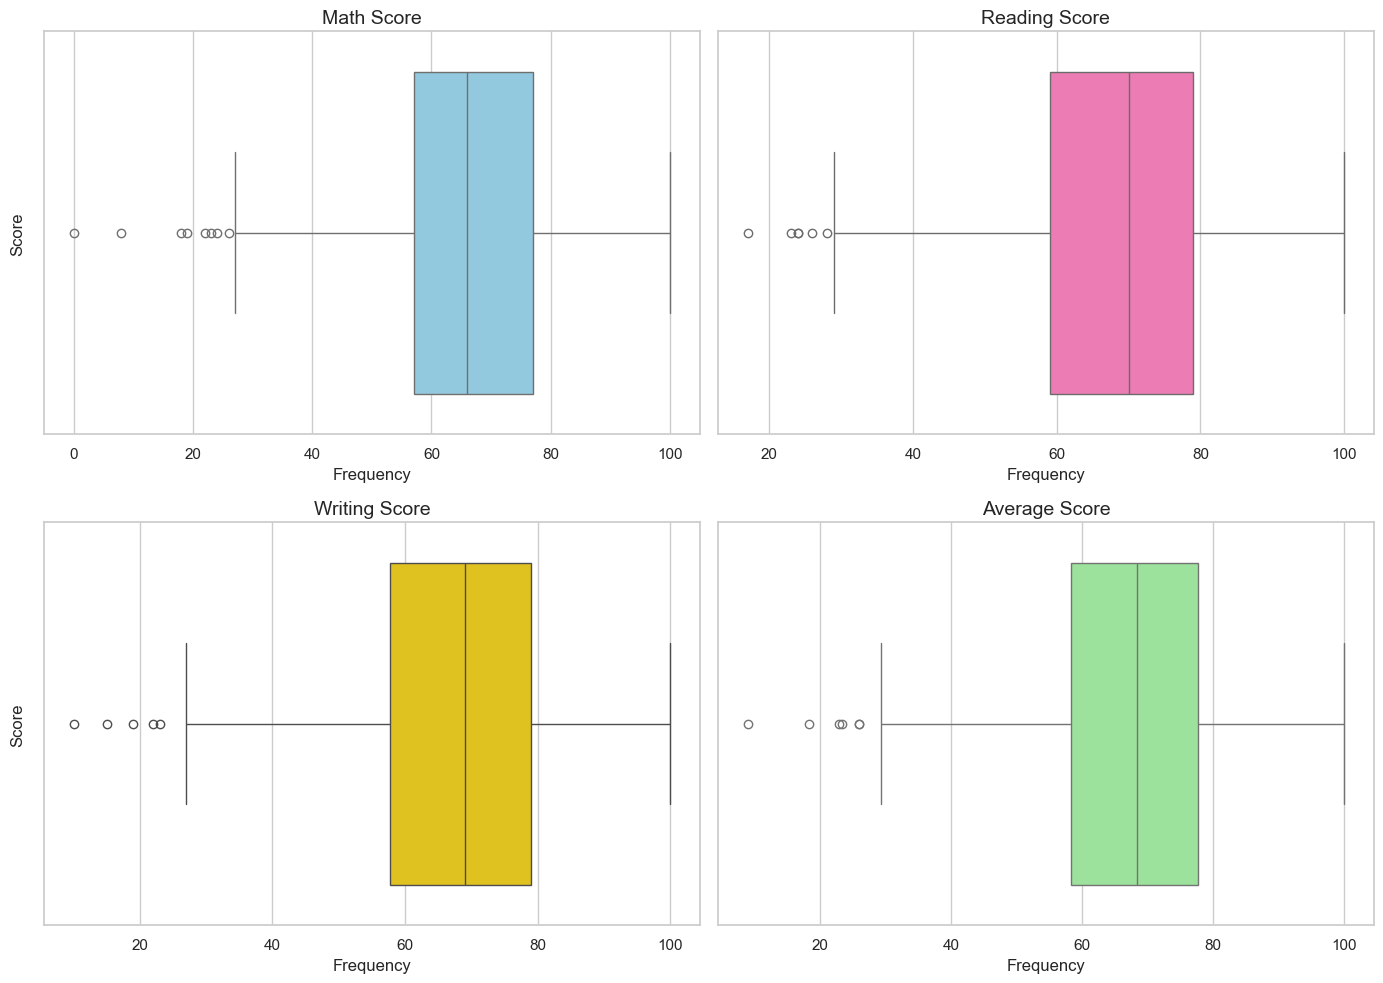

In [30]:
sns.set(style="whitegrid")
fig, axes = plt.subplots(2, 2, figsize = (14, 10), sharey = True)

# Define data and styles
score_columns = ['math_score', 'reading_score', 'writing_score', 'average_score']
colors = ['skyblue', 'hotpink', 'gold', 'lightgreen']
titles = ['Math Score', 'Reading Score', 'Writing Score', 'Average Score']

# Flatten the 2x2 axes array for easier iteration
axes = axes.flatten()

# Plot each boxplot
for ax, col, color, title in zip(axes, score_columns, colors, titles):
    sns.boxplot(x = df[col], ax = ax, color = color)
    ax.set_title(title, fontsize = 14)
    ax.set_xlabel("Frequency")
    ax.set_ylabel("Score", fontsize = 12)
    ax.tick_params(axis = 'x', labelsize = 11)

plt.tight_layout()
plt.show()

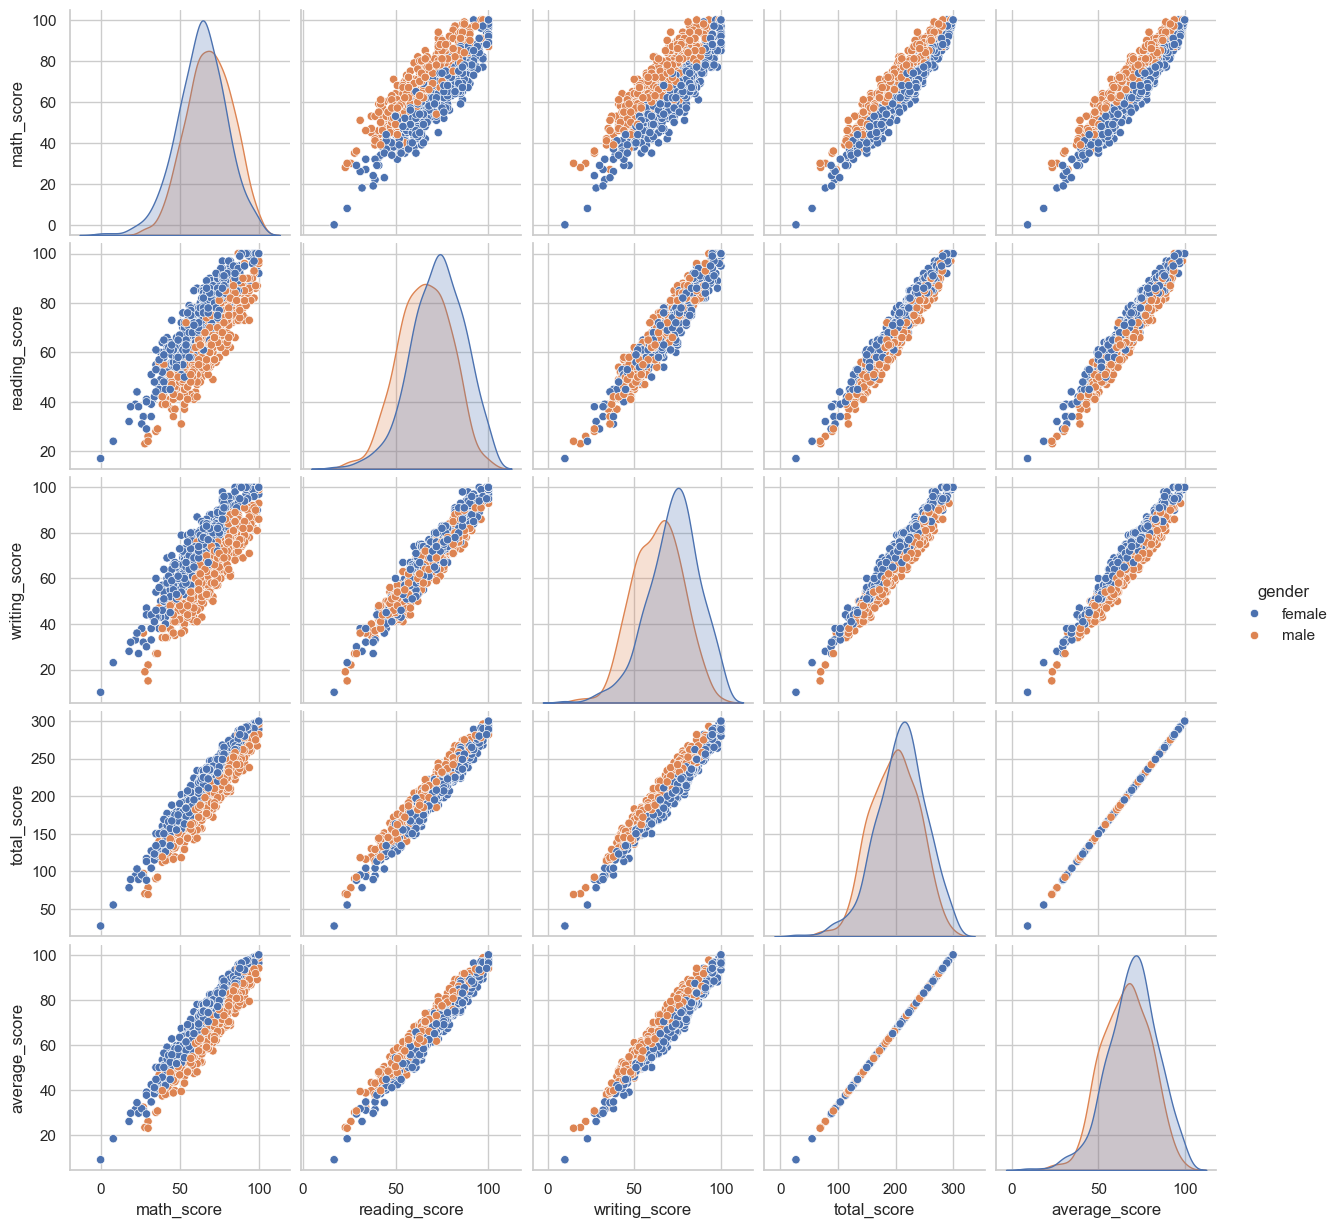

In [31]:
sns.pairplot(df,hue = 'gender')
plt.show()

#### Insights

- From the above plot it is clear that all the scores increase linearly with each other.

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

### 5. Conclusions

- Student's Performance is related with lunch, race, parental level education
- Females lead in pass percentage and also are top-scorers
- Student's Performance is not much related with test preparation course
- Finishing preparation course is benefitial.